<a href="https://colab.research.google.com/github/alissonfreitas10/Repositorio_1/blob/master/1%C2%BA_Projeto__Analisando_Dados_do_Airbnb_Cidade_de_Lisboa%2C_Portugal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Análise dos Dados do Airbnb - Sua Cidade

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Lisboa, Capital de Portugal, e ver quais insights podem ser extraídos a partir de dados brutos.**

<center><img alt="Analisando Airbnb" width="70%" src="https://i.ytimg.com/vi/Jc03tLBDMS8/maxresdefault.jpg"></center>


## Obtenção dos Dados


Todos os dados usados aqui foram obitidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

Para o análise exploratótio inicial, será baixado apenas o serguinte arquivo: 


*   listeings.csv - [Resumo de informações e métricas para listagens em Lisboa (bom para visualizações).](http://data.insideairbnb.com/portugal/lisbon/lisbon/2019-07-22/visualisations/listings.csv)

Também será importado algumas bibliotecas para auxilio do desenvolvimento deste notebook.

In [0]:
# importar os pacotes necessarios para o análise dos dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/portugal/lisbon/lisbon/2019-07-22/visualisations/listings.csv')


## Análise dos Dados


Esta etapa consiste em criar uma conciência situacional inicial e permitir um melhor entendimento de como os dados estão estruturados.

**Dicionário das variáveis**


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias



###Analisando o conjunto de dados

As 5 primeiras linhas do *dataset* para melhor avaliação

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69675,-9.19840,Entire home/apt,36,3,10,2019-05-21,0.17,1,278
1,25659,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,60,3,103,2019-07-16,1.61,1,294
2,28066,ear the birds,120855,Lucia,Azambuja,Aveiras de Cima,39.14654,-8.91503,Private room,53,1,0,NaN,NaN,1,365
3,29138,Room for rent in shared house,125304,Susana,Lisboa,Areeiro,38.73634,-9.13792,Private room,71,1,0,NaN,NaN,1,365
4,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,60,3,305,2019-06-12,2.93,1,328


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

A segui será mostrado a quantidade de entradas que nosso conjunto de dados possui e ver os tipo de cada coluna. 

Obs.: Este *dataset* é uma versão "resumida" do Airbnb. Na mesma página onde foi baixado o aquivo [listings.csv](http://data.insideairbnb.com/portugal/lisbon/lisbon/2019-07-22/visualisations/listings.csv), há uma versão completa com mais 35847 entrada e 106 variáveis ([listings.csv.gz](http://data.insideairbnb.com/portugal/lisbon/lisbon/2019-07-22/data/listings.csv.gz))

In [4]:
# identificar o volume de dados do DataFrame
print('Variáveis->\t{}'.format(df.shape[0]))
print('Entradas->\t{}'.format(df.shape[1]))

Variáveis->	25085
Entradas->	16


In [5]:
# informar cada tipo das variáveis existente no DataFrame(basicamente as colunas existentes)
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Avaliando os valores ausentes do dataset.


*   É possivel ver que as colunas `reviews_per_month` e `last_review` possuem cada uma 17,29% dos valores faltantes. 


*   As variáveis `name ` possui quase 0,1% e a `host_name` possui 0,7% de valores nulos. 


*   Já as demais variáveis não possuem valores nulos.

Obs.: Foi multiplicado por 100 para o melhor entendimento dos números.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
# 1°(df.isnull()) mostra no dataset os valores nulos.
# 2° (df.isnull().sum()) informa a quantidade de valores nulos em cada variável. 
# 3° (df.shape[0]) informa a quantidade de variáveis 
# 4° (.sort_values(ascending=False) ordena os valores de forma decrescente
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

reviews_per_month                 17.293203
last_review                       17.293203
name                               0.099661
host_name                          0.063783
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Será plotado um hitograma para identificar a distribuição das variáveis.

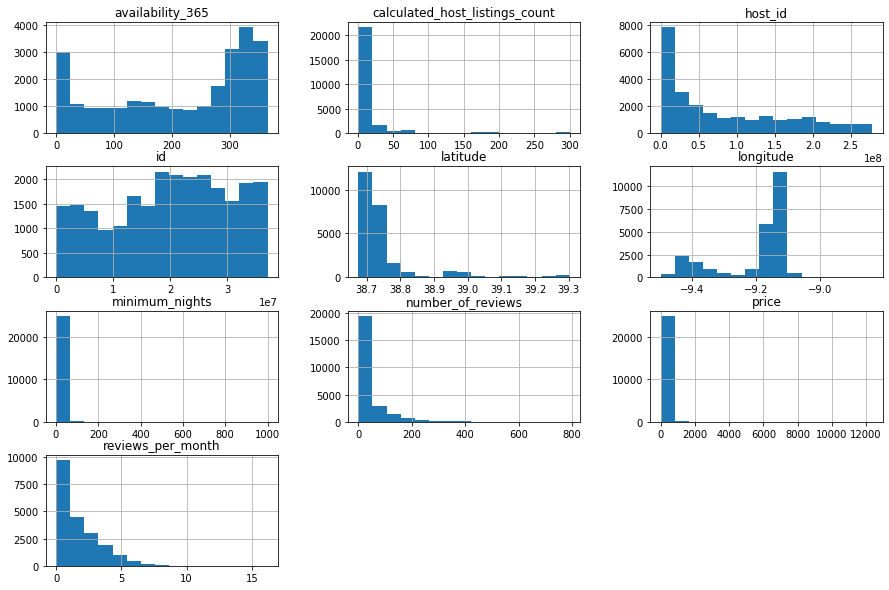

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


### **Q4. Qual a média dos preços de aluguel?**

A média de preços aplicado pela Airbnb em Lisboa é de **€ 96,28**.

In [8]:
# ver a média do peço conforme o dataset
price_media =float(df[['price']].sum()/df.shape[0])
print('Média: € {:.2f}.'.format(price_media))

Média: € 96.29.


### **Q5. Qual a correlação existente entre as variáveis**

Para demostrar essa correlação entra as variáveis, se faz necessário criar uma matriz de correlação e gerar um *heatmap* a partir dessa matriaz, usando a biblioteca `seaborn`.

In [9]:
# criando a matriz de correlação de algumas variáveis do dataset
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.007695,-0.095157,-0.130407,-0.015172,0.022103
minimum_nights,-0.007695,1.000000,-0.021151,-0.046239,-0.014685,-0.020922
number_of_reviews,-0.095157,-0.021151,1.000000,0.639011,-0.095514,0.054779
reviews_per_month,-0.130407,-0.046239,0.639011,1.000000,-0.120909,0.011453
calculated_host_listings_count,-0.015172,-0.014685,-0.095514,-0.120909,1.000000,0.067872
availability_365,0.022103,-0.020922,0.054779,0.011453,0.067872,1.000000


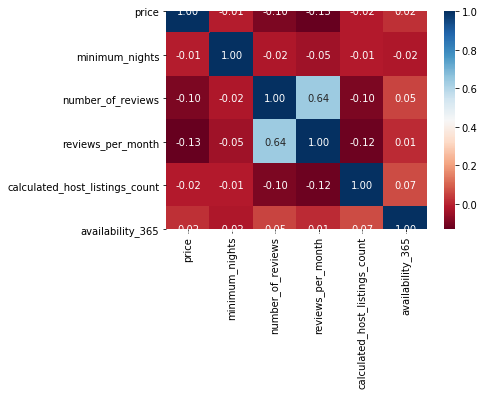

In [10]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f',square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anuciada no Airbnb. Onde existe três tipo de acomodações, que são casas/apartamentos, aluguel de um quarto ou dividir um quarto com outras pessoas. 

Vamos utilizar o método `value_counts()`.*italicized text*, para contar a quantidade de ocorrencias de cada tipo de aluguel. 

Após análise foi constatado que em Lisboa a Airbnb tem um total de **25.085** imóveis para alugar, dos quais **18.429** casas/apt que equivalente à **73,46%**, onde em segundo lugar tem os quartos privados com **6.238(24,87%)** e por ultimo quartos coletivos com **418(1,67%)**.

In [11]:
# mostrar a quantidade de cada tipo de imóvel disponível na variável roon_type.
df.room_type.value_counts()

Entire home/apt    18429
Private room        6238
Shared room          418
Name: room_type, dtype: int64

In [12]:
# mostrar a porcentagem de cada tipo de imóvel disponível multiplicado por 100 para melhor entendimento. 
df.room_type.value_counts()/df.shape[0]*100

Entire home/apt    73.466215
Private room       24.867451
Shared room         1.666334
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara de Lisboa?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [13]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15]

neighbourhood
Ramada e Caneas                                    321.652174
Vermelha                                           292.500000
Mina de gua                                        287.083333
Cardosas                                           280.000000
Ota                                                259.000000
Freiria                                            231.000000
Benfica                                            198.911111
Aveiras de Baixo                                   195.666667
Azambuja                                           189.200000
Carnide                                            188.203704
So Domingos de Benfica                             174.461111
Bucelas                                            174.200000
Alcabideche                                        156.668067
Almargem do Bispo, Pro Pinheiro e Montelavar       156.285714
Enxara do Bispo, Gradil e Vila Franca do Rosrio    152.000000
Name: price, dtype: float64

Acima, vemos alguns bairros com uma média mais alta de aluguel na cidade de Lisboa. 


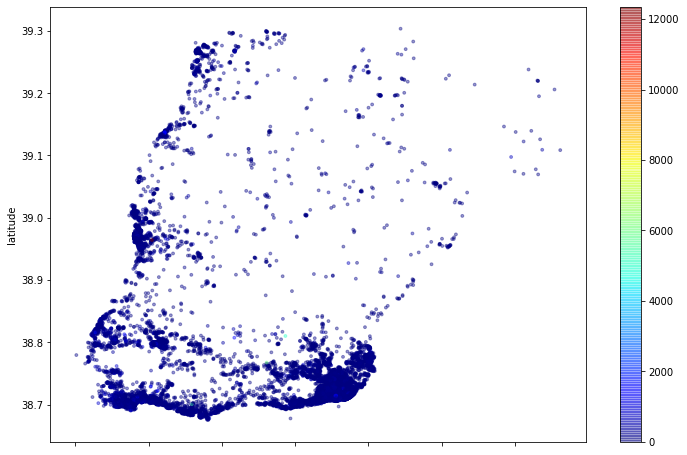

In [14]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

A média mínima para noites de aluguel é 3 noites, arredondando para mais.

E também foi feito a média de aluguel por bairro, onde foi listados em ordem decrescente os 15 primeiros. 

In [15]:
# média do mínimo de noites para aluguel do dataset
df[['minimum_nights']].mean()

minimum_nights    2.831054
dtype: float64

In [16]:
# ver a média da coluna `minimum_nights`` por bairro.
df.groupby(['neighbourhood']).minimum_nights.mean().sort_values(ascending=False)[:15]

neighbourhood
Ventosa                                             45.111111
Santa Clara                                          8.000000
Lumiar                                               7.625000
Ota                                                  7.000000
Moscavide e Portela                                  6.670455
Oeiras e S.Julio da Barra, Pao de Arcos e Caxias     6.542510
Odivelas                                             6.436364
Vermelha                                             6.000000
Avenidas Novas                                       5.601918
Porto Salvo                                          5.111111
Ribamar                                              4.909091
Santo Antnio dos Cavaleiros e Frielas                4.800000
Queluz e Belas                                       4.304348
Encosta do Sol                                       4.294118
Carnide                                              4.240741
Name: minimum_nights, dtype: float64

## Conclusões


Após análise superficial da base de dado do Airbnb da cidade de Lisboa, percebeu que existe *outliers* em algumas variáveis, onde isso nos fornece uma certa consistência em algumas informações extraidas. Mais diante disso, temos algumas informações bem relevantes para o nosso notebook. 
